> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import random
from random import randint
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df=pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape
df.dtypes
df.head(1)
df.info()
sum(df.duplicated())
df.isnull().any()
df.director.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

10822

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Since data is huge so let's drop the duplicates
print('Since data is huge so let\'s drop the duplicates')
df.drop_duplicates(inplace=True)

# Check the duplicate count
print('Check the duplicate count')
sum(df.duplicated())

# Check the shape of dataframe
print('Check the shape of dataframe')
df.shape

#Check the null enteries
print('Check the null enteries')
df.isnull().any().count()

#Drop the na values if any
print('Drop the na values if any')
df.dropna()

#format the columns budget_Adj and revenue_adj, also restricted the after decimal places to 2.
print('format the columns budget_Adj and revenue_adj, also restricted the after decimal places to 2')
pd.options.display.float_format = "{:.2f}".format 

#format imdb_id column and split it into two columns one is for the prefix and the second one is for the numeric id value
print('format imdb_id column and split it into two columns one is for the prefix and the second one is for the numeric id value')
df['imdb_id_pre'], df['imdb_id'] = df['imdb_id'].str.split('tt',1).str

#find out missing values Since it's unique id so used a random values to fill values restricted to seven digits.
print('find out missing values Since it\'s unique id so used a random values to fill values restricted to seven digits')
df.imdb_id.fillna(random.randint(1000000,9999999),inplace=True)

#Check for any null enteries of cast column
print('Check for any null enteries of cast column')
df.cast.isnull().any()

#Fill the na values of cast column with phrase 'cast details not available' as random values in this column won't make much sense
#print('Fill the na values of cast column with phrase \'cast details not available\'')
#df.cast.fillna('cast details not available',inplace=True)
print('drop NA values from cast column')
df.dropna(subset=['cast'], inplace=True) 

#Check for any null enteries in dataframe
print('Check for any null enteries in dataframe')
df.isnull().any()

#Check for the unique values of newly created imdb_id_pre column
print('Check for the unique values of newly created imdb_id_pre column')
df.imdb_id_pre.unique()

#unique values of imdb_id_pre array(['', nan], dtype=object) so there's not much point to keep this column
print('unique values of imdb_id_pre array(['', nan], dtype=object) so there\'s not much point to keep this column')
del df['imdb_id_pre']

#Create a new column profit which will be used in the below research analysis
print('Create a new column profit which will be used in the below research analysis')
df['profit']=df['revenue']-df['budget']

#Check the whole structure of dataframe by selecting the forst row.
df.head(1)


Since data is huge so let's drop the duplicates
Check the duplicate count
Check the shape of dataframe
Check the null enteries
Drop the na values if any
format the columns budget_Adj and revenue_adj, also restricted the after decimal places to 2
format imdb_id column and split it into two columns one is for the prefix and the second one is for the numeric id value
find out missing values Since it's unique id so used a random values to fill values restricted to seven digits
Check for any null enteries of cast column
drop NA values from cast column
Check for any null enteries in dataframe
Check for the unique values of newly created imdb_id_pre column
unique values of imdb_id_pre array([, nan], dtype=object) so there's not much point to keep this column
Create a new column profit which will be used in the below research analysis


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are top 5 highest grossing movies of all time? How are budget,runtime and revenue Correlated with the popularity of a movie? )

### Research Question 2  (5 critically acclaimed movies(as per the ratings) of all time which were a financial disaster? And, which genre, Actors and director is most profitable in movie business?)

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
print('List down the top 5 highest grossing movies of all time?')
df.nlargest(5, columns=['profit'])


List down the top 5 highest grossing movies of all time?


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,0499549,9.43,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10,2009,240886902.89,2827123750.41,2544505847
3,140607,2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,1868178225
5231,597,0120338,4.36,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.30,1997,271692064.21,2506405735.42,1645034188
0,135397,0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810
4,168259,2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,1316249360


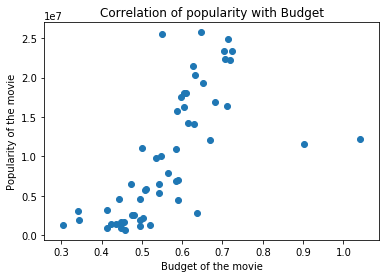

In [12]:
rel_yr=df.groupby('release_year').mean()
revenue_year=rel_yr['revenue']
runtime_year=rel_yr['runtime']
budget_year=rel_yr['budget']
popularity_year=rel_yr['popularity']

#Following graph will show the correlation between popularity of a movie with it's budget

plt.scatter(y=budget_year,x=popularity_year)
plt.ylabel('Popularity of the movie')
plt.xlabel('Budget of the movie')
plt.title('Correlation of popularity with Budget');


In [6]:
# "Analysis of the above graph: Above scatter plot shows the correlation of popularity with the budget of the movie. 
# Since it shows uphill pattern in the middle, we can conclude that huge budget movies 'generally' attract the audience, 
# increasing the popularity level of the movie. Having said that, we can also see in the graph
#that sometimes budget is high but still popularity level of the movie is not high.

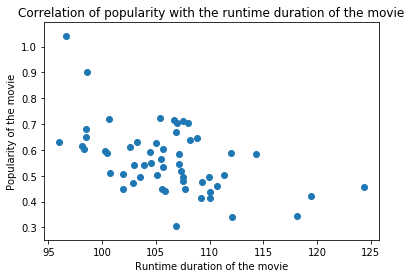

In [13]:
#Following graph will show the correlation between popularity of a movie with it's runtime duration
plt.scatter(x=runtime_year,y=popularity_year)
plt.ylabel('Popularity of the movie')
plt.xlabel('Runtime duration of the movie')
plt.title('Correlation of popularity with the runtime duration of the movie');

In [ ]:
# "Analysis of the above graph: Above scatter plot shows the correlation of popularity with the runtime of the movie. 
# There is a very scattered distribution here, but more dense in the middle. 
# hence we can conclude here that though runtime of a movie doesn't have a stringent effect on the popularity but still
# an average amount of runtime is 'generally' preferred  rather than a long runtime duration.

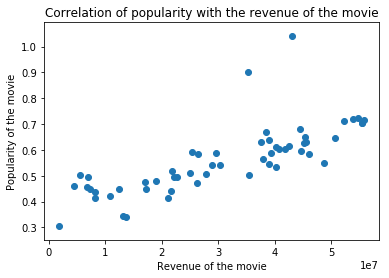

In [14]:
#Following graph will show the correlation between popularity of a movie with it's revenue
plt.scatter(x=revenue_year,y=popularity_year)
plt.ylabel('Popularity of the movie')
plt.xlabel('Revenue of the movie')
plt.title('Correlation of popularity with the revenue of the movie');

In [2]:
# "Analysis of the above graph: Above scatter plot shows the correlation of popularity with the revenue of the movie. 
# Since it shows uphill pattern, it means popularity has a positive relationship with the revenue parameter. So as we are
# moving on the x-axis (representing revenue) , so is the value on the y-axis is movie. Bigger revenue might result in 
# better popularity . (Outliers not considered here)"

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
print('5 critically acclaimed movies(as per the ratings) of all time which were a financial disaster')
df.loc[df.groupby(['vote_average'])['profit'].idxmin()].tail(5)

5 critically acclaimed movies(as per the ratings) of all time which were a financial disaster


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
3224,20313,1270491,0.22,0,0,John Mayer: Where the Light Is Live in Los Ang...,John Mayer|Steve Jordan|Pino Palladino|David R...,NaN,NaN,NaN,...,164,Music,NaN,7/1/08,16,8.50,2008,0.00,0.00,0
2401,45644,5810444,0.07,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,163,Music,NaN,9/21/10,10,8.60,2010,0.00,0.00,0
6911,24970,0110758,0.21,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,NaN,David Mallet,NaN,...,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/06,23,8.70,2006,0.00,0.00,0
1200,374430,3973198,0.13,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,NaN,Carl Tibbetts,NaN,...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/14,41,8.80,2014,0.00,0.00,0
3894,125336,2044056,0.01,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,900,Documentary,NaN,9/3/11,14,9.20,2011,0.00,0.00,0


Director of the top five highest profitable movies


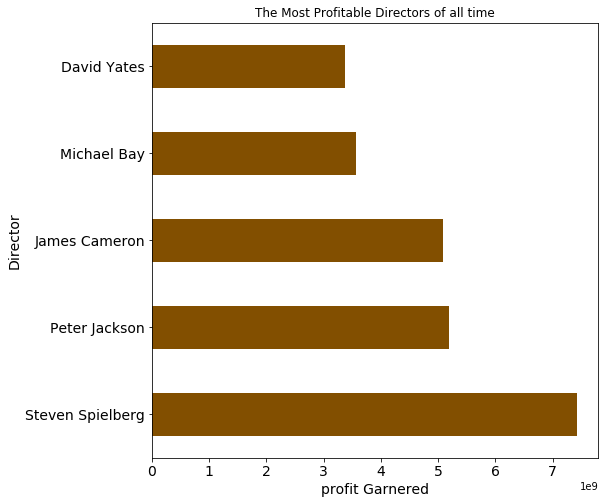

In [16]:
#Most profitable Director on the basis of profit garnered by their respective movies:
print('Director of the top five highest profitable movies')
max_director=df.groupby(['director'])['profit'].sum()
max_director_final=max_director.nlargest(5)
pd = max_director_final.plot.barh(color = '#824f00', fontsize = 14)
pd.set(title = 'The Most Profitable Directors of all time')
pd.set_xlabel('profit Garnered', fontsize = '14')
pd.set_ylabel('Director', fontsize = '14')
pd.figure.set_size_inches(8, 8)
plt.show()

In [ ]:
# "Analysis of the above graph: Above graph gives a list of topmost Directors who have proved over the years that they 
# are good for movie business as far as profits are concerned . People have liked their movies over the years making their 
# movie profit average quite impressive. So, if you are looking to invest in a movie business, these are the directors 
# for making a good bet on."

In [33]:
#Most profitable Actors on the basis of profit garnered by their respective movies:
print('Most profitable Actors on the basis of profit garnered by their respective movies')
full_cast=df['cast'].str.cat(sep = '|')
full_cast=pd.Series(full_cast.split('|'))
df_cast=df.loc[df['cast'].isin (full_cast)]
max_cast=df_cast.groupby(['cast'])['profit'].sum()
max_cast_final=max_cast.nlargest(5)
pa = max_cast_final.plot.barh(color = '#824f00', fontsize = 14)
pa.set(title = 'The Most Profitable Actors of all time')
pa.set_xlabel('profit Garnered', fontsize = '14')
pa.set_ylabel('Actors', fontsize = '14')
pa.figure.set_size_inches(8, 8)
plt.show()


Most profitable Actors on the basis of profit garnered by their respective movies


AttributeError: 'AxesSubplot' object has no attribute 'Series'

In [ ]:
# "Analysis of the above graph: Above graph clearly depicts the topmost consistent actors 
# in terms of profit garnered by their movies on an average over years.
# It is safe to conclude here that these are on an average most liked Actors as people have consistently paid to see their acting 
# and making their movies do a good business on box-office.So if you are looking for a hit movie to watch over weekend, 
# you can checkout their movies. Or if you are looking to direct a movie, these actors can be a pretty safe bet."

In [22]:

#Most profitable Genres on the basis of profit garnered by their respective movies:
print('Most profitable Genres on the basis of profit garnered by their respective movies')
full_genres=df['genres'].str.cat(sep = '|')
full_genres=pd.Series(full_genres.split('|'))
df_genres=df.loc[df['genres'].isin (full_genres)]
max_genres=df_genres.groupby(['genres'])['profit'].sum()
max_genres_final=max_genres.nlargest(5)
pg = max_genres_final.plot.barh(color = '#824f00', fontsize = 14)
pg.set(title = 'The Most Profitable Movie Genres')
pg.set_xlabel('profit Garnered', fontsize = '14')
pg.set_ylabel('Genres', fontsize = '14')
pg.figure.set_size_inches(8, 8)
plt.show()

Most profitable Genres on the basis of profit garnered by their respective movies


AttributeError: 'AxesSubplot' object has no attribute 'Series'

In [ ]:
# "Analysis of the above graph: This graph clearly shows the highest grossing movie genres, Comedy being the topmost. 
# It means that Comedy movies are liked by a wider audience and is a profitable genre to dive in for an investor"

<a id='conclusions'></a>
## Conclusions


To Summarise my findings and observations on the basis of above analysis, i would like to mention below points:

As per the above analysis, i can see the popularity trend of movies on the parameters of budget, runtime and revenue (Scatter plots).

I can see the most successful directors,actors and genres on the basis of profit their movies garnered over the time. This helps in figuring out the probability of a movie being successful if it belongs to a certain genre with a certain cast and director onboard.

I know now  that sometimes movies are good (critically acclaimed) but still they fail to make profits and considered a flop.

I now know the top 5 most popular movies of all time, also the popular genres? If in any case, i want to make a movie recommendation.

## Limitations

All the analysis has been done here is on the basis of the TMDB.csv file provided and there are following limitations on the dataset and hence, on the analysis:

* latest data provided in the dataset is of 2015 , and right now 2018 going on , A lot of Trends can be changed over a time period of 3 years(approx). hence, almost all the trends and their correlation with certain parameters can be different in today's context

* List of actors and directors is constant here with the data being 3 years old. A lot of highly influential players have joined the business after 2015 who can prove to be a game changer. So incase anyone's interested in investing in the movie business now, they would have to consider these outliers as well to make a safe bet.

* The whole analysis is done on the provided dataset with approx. 10k rows ranging the movie data from release year 1960 to 2015. Though an impressive amount of data for analysis, it cannot certainly claim that it holds almost all the movies in this time period , ommiting a good list of actors/directors. Also , it doesn't claim that it list almost all the movies of the listed actors/directors.

* Unit of currency is not mentioned in terms of revenue/budget/profit, hence i have considered their numeric value rather than any particular currency, omitting the currency conversion or exchange rates.

* I have dropped null values of particular columns as per of "Data Cleaning" , which might result to unintentional neglect of any outliers.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0